In [1]:
# Importing all the required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading and displying the dataset
df=pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Data Exploration

In [3]:
# Returns statistics on Object type values of columns
df.describe(include=['O']).T

,count,unique,top,freq
gender,215,2,M,139
ssc_b,215,2,Central,116
hsc_b,215,2,Others,131
hsc_s,215,3,Commerce,113
degree_t,215,3,Comm&Mgmt,145
workex,215,2,No,141
specialisation,215,2,Mkt&Fin,120
status,215,2,Placed,148


In [4]:
# Returns statistics on numeric type values of columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [5]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
# Returns total sum of total null values in each column
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
# Returns If 0 as True else False in each column
df.eq(0).any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary            False
dtype: bool

In [8]:
# Returns the shape (rows,columns)
df.shape

(215, 15)

# Data Visualization

### Count Plot of gender

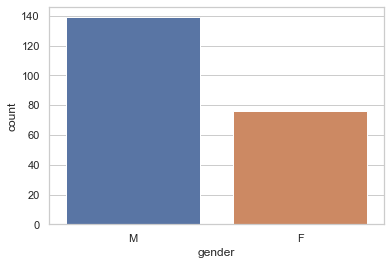

In [9]:
# Visualising the column 'gender' using Countplot
sns.set_style('whitegrid')
sns.countplot(df.gender)
plt.show()

In [10]:
# Returns the count plot
def plot_categorical(feature , dataset):
    ax = sns.countplot(y=feature, data=dataset)
    plt.title('Distribution of ' + feature)
    plt.xlabel('Count')

    total = len(dataset[feature])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 *p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))

    plt.show()

### Count Plot of Hsc Stream

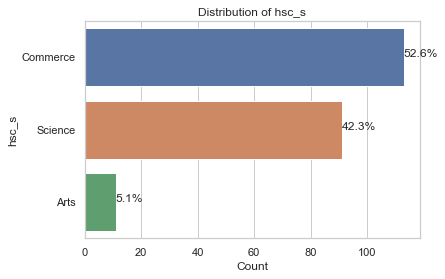

In [11]:
plot_categorical('hsc_s' , df)

### Count Plot of Degree Tech

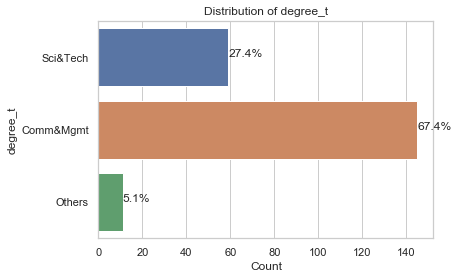

In [12]:
plot_categorical('degree_t' , df)

### Count Plot of Specialisation

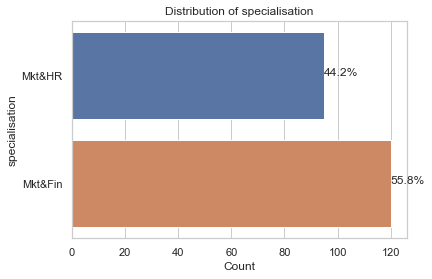

In [13]:
plot_categorical('specialisation' , df)

### Count Plot of Placement Status

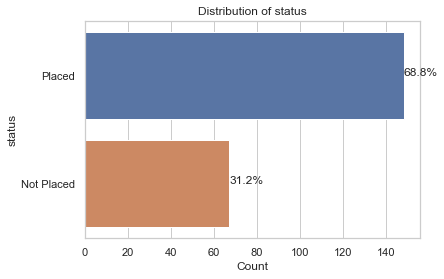

In [14]:
plot_categorical('status' , df)

### Count Plot Gender with Work Experience

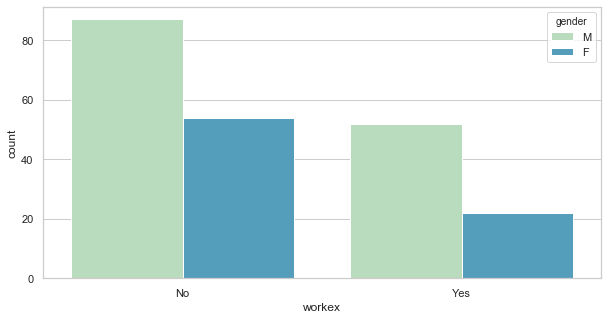

In [15]:
# Visualising the columns 'workex' with hue 'gender' using Countplot
plt.figure(figsize=(10,5))
sns.countplot(x='workex',data = df, hue = 'gender',palette='GnBu')
plt.show()

Gender plot with Work Experience - Observation

From the Count plot we observed that the number of Male as more work experience as compare to number of Female.

### Count Plot Gender with SCC Board

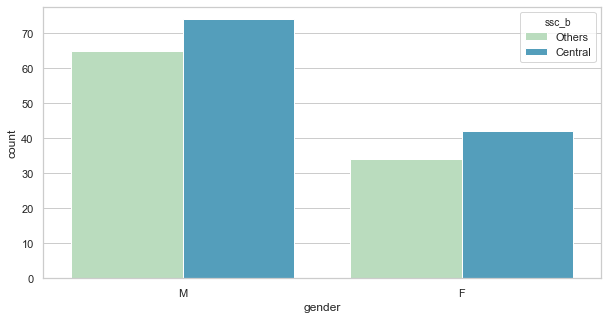

In [16]:
# Visualising the columns 'gender' with hue 'ssc_b' using Countplot
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data = df, hue = 'ssc_b',palette='GnBu')
plt.show()

Gender plot with SSC Board - Observation

From the Count plot we observed that the number of Male are more that the total number of Female.

### Count Plot Gender with HSC Board

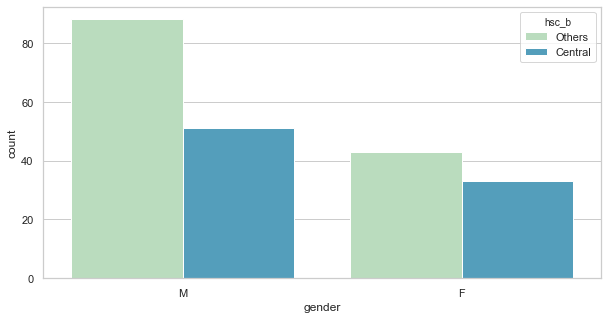

In [17]:
# Visualising the columns 'gender' with hue 'hsc_b' using Countplot
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data = df, hue = 'hsc_b',palette='GnBu')
plt.show()

Gender plot with HSC Board - Observation

From the Count plot we observed that the number of Male are more that the total number of Female.

### Count Plot Gender with HSC Stream

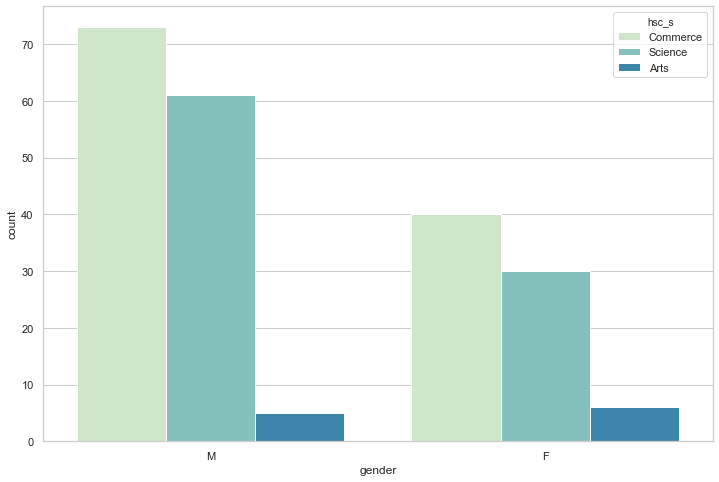

In [18]:
# Visualising the columns 'gender' with hue 'hsc_s' using Countplot
plt.figure(figsize=(12,8))
sns.countplot(x='gender',data = df, hue = 'hsc_s',palette='GnBu')
plt.show()

HSC Stream - Observation

From the Count plot we observed that the number of Commerce student are more that the total number of Science and Arts.

### Count Plot Gender with Degree Board

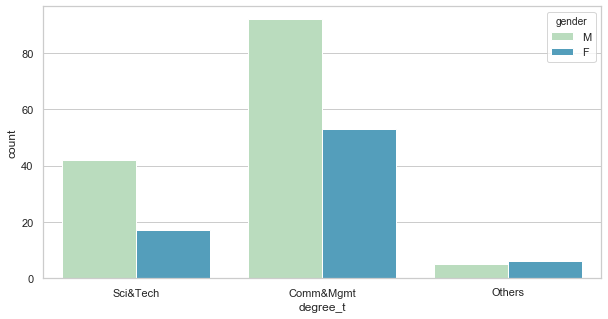

In [19]:
# Visualising the columns 'degree_t' with hue 'gender' using Countplot
plt.figure(figsize=(10,5))
sns.countplot(x='degree_t',data = df, hue = 'gender',palette='GnBu')
plt.show()

Degree Board - Observation

From the Count plot we observed that the number of Male student are more in Comm&Mgmt technology that the total number of Females.

### Count Plot Gender with Placement Status

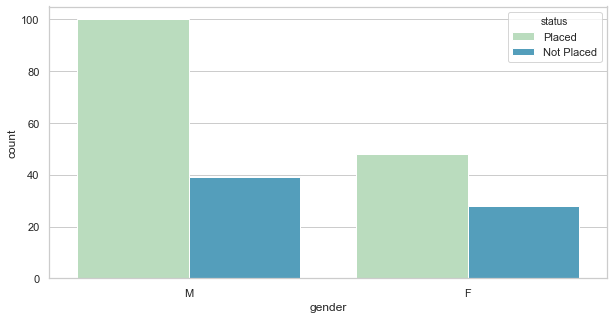

In [20]:
# Visualising the columns 'gender' with hue 'status' using Countplot
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data = df, hue = 'status',palette='GnBu')
plt.show()

Placement Status - Observation

From the Count plot we observed that the number of Male have got more Placement that the total number of Females.

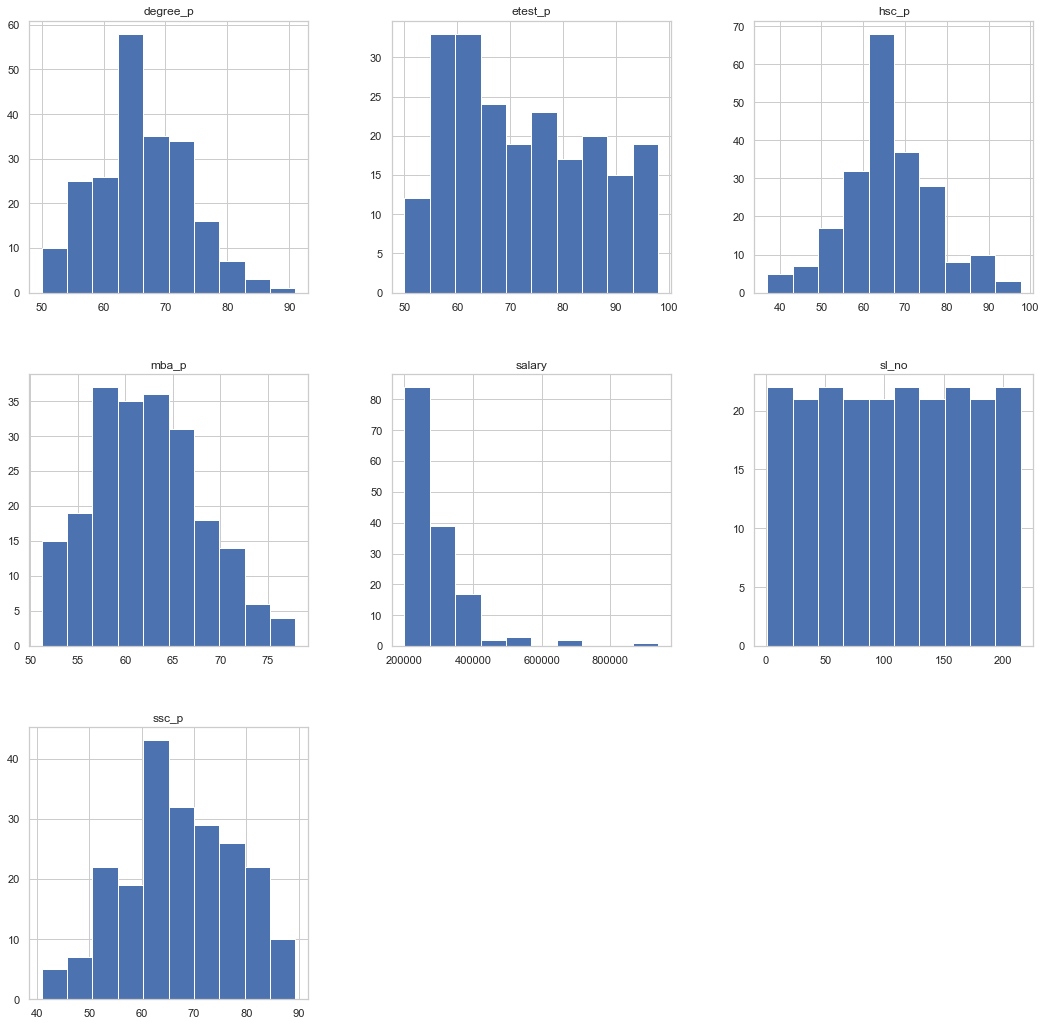

In [21]:
df.hist(figsize=(18,18))
plt.show()

# Pair Plot

<Figure size 720x576 with 0 Axes>

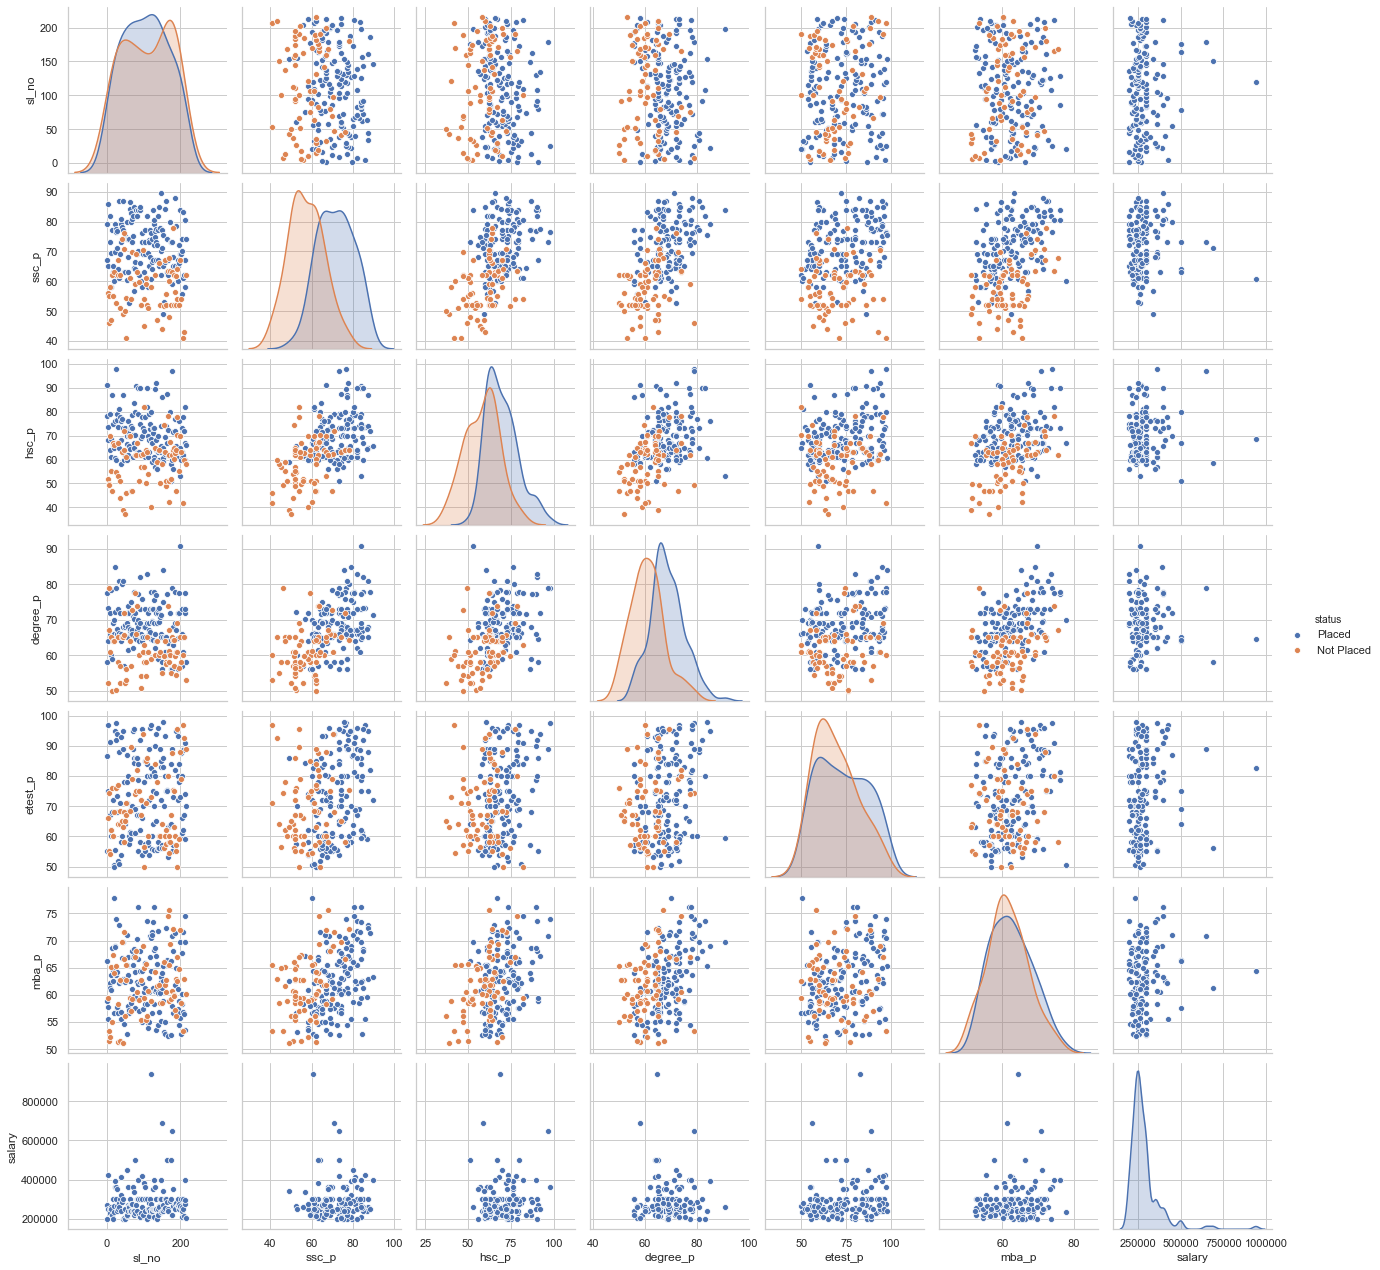

In [22]:
# Visualising the pairplot
plt.figure(figsize=(10,8))
sns.pairplot(df,hue='status')
plt.show()

# Data Pre-Processing

In [23]:
#df['salary'].fillna(0, inplace=True)

In [24]:
"""# converting to string data type 
df["salary"]= df["salary"].astype(str) 

# slicing till 2nd last element 
df["salary"]= df["salary"].str.slice(0,-2,1)

# converting to int data type 
df["salary"]= df["salary"].astype(int) 

df.head()"""

'# converting to string data type \ndf["salary"]= df["salary"].astype(str) \n\n# slicing till 2nd last element \ndf["salary"]= df["salary"].str.slice(0,-2,1)\n\n# converting to int data type \ndf["salary"]= df["salary"].astype(int) \n\ndf.head()'

In [25]:
"""# Converting income
df.loc[df['salary'] <= 0, 'salary'] = 0
df.loc[(df['salary'] >= 200000) & (df['salary'] <= 282500), 'salary'] = 1
df.loc[ df['salary'] >= 282500, 'salary'] = 2"""

"# Converting income\ndf.loc[df['salary'] <= 0, 'salary'] = 0\ndf.loc[(df['salary'] >= 200000) & (df['salary'] <= 282500), 'salary'] = 1\ndf.loc[ df['salary'] >= 282500, 'salary'] = 2"

In [22]:
df.drop(['sl_no','salary'], inplace = True ,axis = 1)

In [23]:
#  Returns name of Object column
mylist = df.select_dtypes(include=['O']).columns
mylist

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [24]:
# Returns total unique values in each column with Object type
for data in df.select_dtypes(include=['O']).columns[:]:
    print(data,":",len(df[data].unique()),"labels")

gender : 2 labels
ssc_b : 2 labels
hsc_b : 2 labels
hsc_s : 3 labels
degree_t : 3 labels
workex : 2 labels
specialisation : 2 labels
status : 2 labels


In [25]:
# Returns unique values in each column with Object type
for data in df.select_dtypes(include=['O']).columns[:]:
    print(data,"contains : ",df[data].unique(),"labels")

gender contains :  ['M' 'F'] labels
ssc_b contains :  ['Others' 'Central'] labels
hsc_b contains :  ['Others' 'Central'] labels
hsc_s contains :  ['Commerce' 'Science' 'Arts'] labels
degree_t contains :  ['Sci&Tech' 'Comm&Mgmt' 'Others'] labels
workex contains :  ['No' 'Yes'] labels
specialisation contains :  ['Mkt&HR' 'Mkt&Fin'] labels
status contains :  ['Placed' 'Not Placed'] labels


In [26]:
df.shape

(215, 13)

In [27]:
for i in df.columns:
    label=LabelEncoder()
    df[i]=label.fit_transform(df[i])

In [28]:
# Converting the categorial valiable to dummies
#df=pd.get_dummies(df, drop_first = True)

In [29]:
df.shape

(215, 13)

In [30]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,46,1,93,1,1,14,2,0,9,1,64,1
1,1,82,0,79,1,2,74,2,1,74,0,153,1
2,1,42,0,51,0,0,27,0,0,55,0,50,1
3,1,22,0,14,0,2,3,2,0,37,1,72,0
4,1,98,0,70,0,1,65,0,0,96,0,28,1


# Correlation Matrix

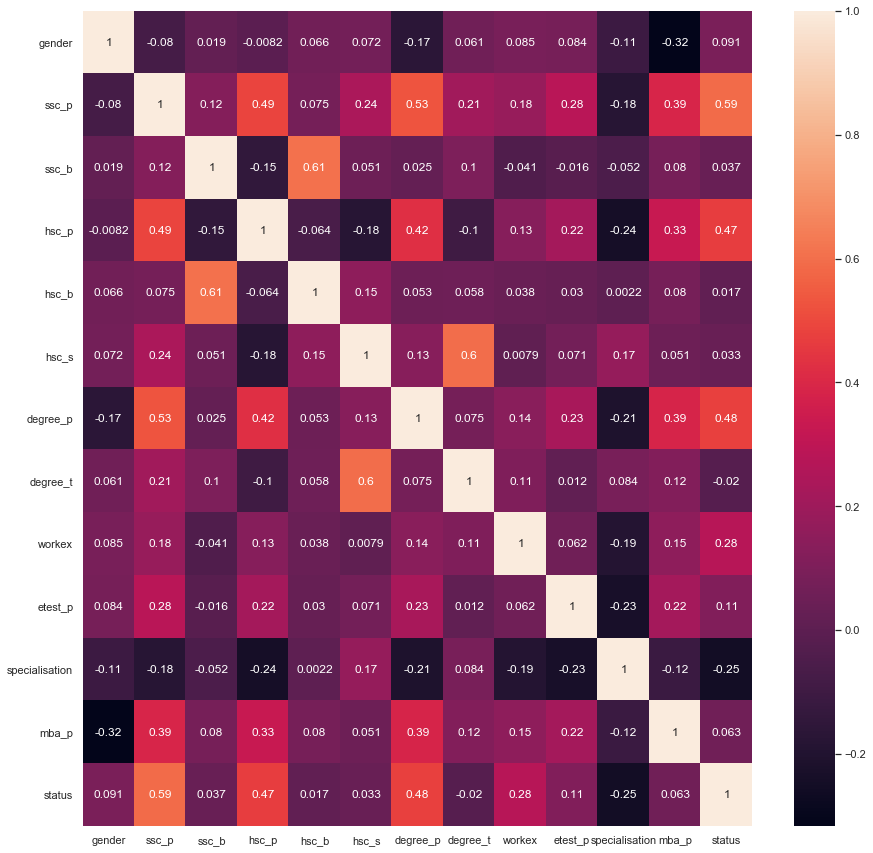

In [31]:
# Returns the correlation between all the attributes
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [32]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features = correlation(df, 0.70)
len(set(corr_features))

0

In [34]:
# Selecting 'salary' as y and remaining all the features as X
X=df.drop(['status'],axis=1)
y=df['status']

# Spliting data into Train/Test

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
print("Train dataset",X_train.shape,y_train.shape)
print("Test dataset",X_test.shape,y_test.shape)

Train dataset (172, 12) (172,)
Test dataset (43, 12) (43,)


In [36]:
X_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
50,0,68,0,67,0,2,47,0,0,36,1,122
147,1,56,0,71,0,1,36,0,0,68,0,106
80,0,51,1,32,1,1,48,0,1,38,1,107
171,1,83,1,82,1,1,60,0,1,33,0,150
0,1,46,1,93,1,1,14,2,0,9,1,64


In [37]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Feature Scaling is performed and the model perfoms faster on scaling the values

## Defining Modal Confusion Metrix and Classification Report

In [56]:
# Returns the models confusion metrix and classification report

def plot_scores(name_of_model,X_test,y_test):
    # Predicting the model
    y_pred = name_of_model.predict(X_test)
    
    # Returns confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting the confusion matrix
    plt.figure(figsize=(10,7))
    p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    
    print("\n")
    print("\t\t----------Classification report----------\n")
    # Returns Classification Report
    print(classification_report(y_test, y_pred))

# Model Building

## Finding optimal number of clusters using Elbow Method

In [57]:
# Calculating accuracy score values for 1 to 21 clusters
accuracy_score=[]
for k in range(1,15):
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X,y,cv=10)
    accuracy_score.append(score.mean())

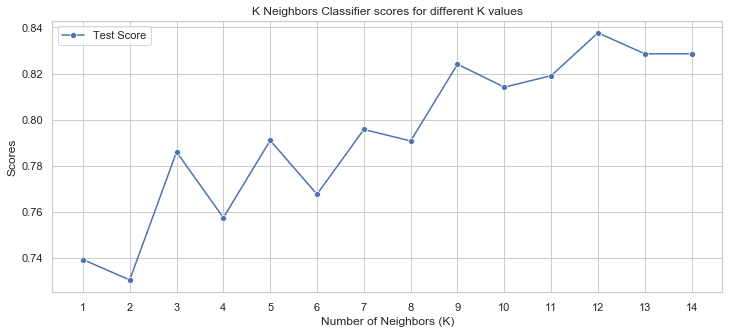

In [58]:
# Plotting the accuracy score values
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),accuracy_score,marker='o',label='Test Score')
plt.xticks([i for i in range(1, 15)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()


# KNN Model Building

In [59]:
# Training the KNeighborsClassifier model with n_neighbors=12
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

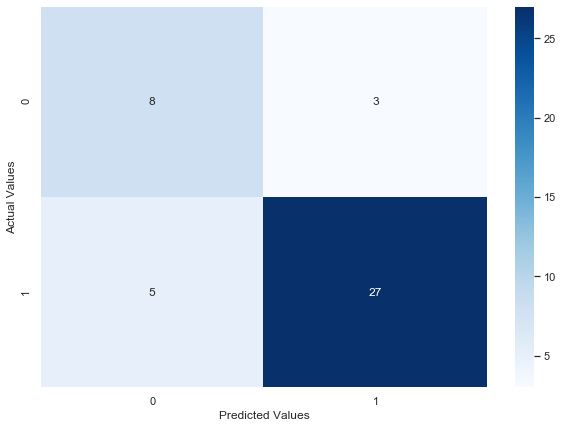



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.90      0.84      0.87        32

    accuracy                           0.81        43
   macro avg       0.76      0.79      0.77        43
weighted avg       0.83      0.81      0.82        43



In [60]:
plot_scores(knn, X_test,y_test)

# LogisticRegression Model Building

In [61]:
# Entering the parameters for hypertunning 
param_grid_log = {'penalty' : ['l1', 'l2'],
                  'C': [0.1,1.0,10,20,100],
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                 }


In [62]:
# Training the LogisticRegression model with RandomizedSearchCV and ploting the confusion metrix

log_reg=LogisticRegression()
log_reg_CV = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid_log, cv=10,
                             n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)

log_reg_CV.fit(X_train, y_train)

print(log_reg_CV.best_params_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}


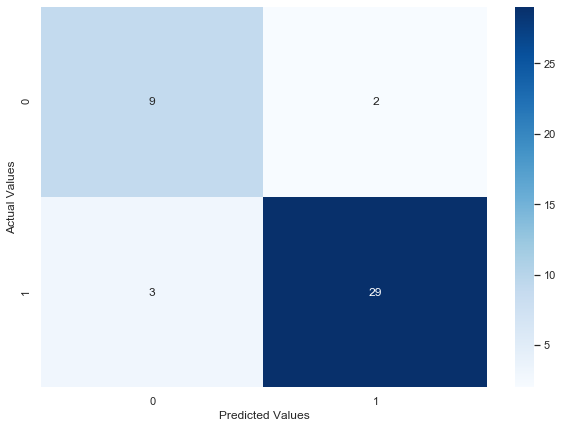



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.94      0.91      0.92        32

    accuracy                           0.88        43
   macro avg       0.84      0.86      0.85        43
weighted avg       0.89      0.88      0.89        43



In [63]:
plot_scores(log_reg_CV, X_test,y_test)

# DecisionTree Model Building

In [64]:
# Entering the parameters for hypertunning 
param_grid = {'min_samples_split': [2,5,10,15,20,40, 50, 60, 70], 
              'min_samples_leaf': [1,2,5,10,12, 13, 14, 15, 16, 17], 
              'max_features': ["auto","sqrt"],
              'max_depth': [int(x) for x in np.linspace(start=5,stop=30,num=3)], 
              'criterion': ['entropy','gini']}

In [65]:
# Training the DecisionTreeClassifier model with RandomizedSearchCV and ploting the confusion metrix

dc_tree=DecisionTreeClassifier()
dtree_CV = RandomizedSearchCV(estimator=dc_tree, param_distributions=param_grid, cv=10,
                             n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)
dtree_CV.fit(X_train, y_train)

print(dtree_CV.best_params_)

{'min_samples_split': 20, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}


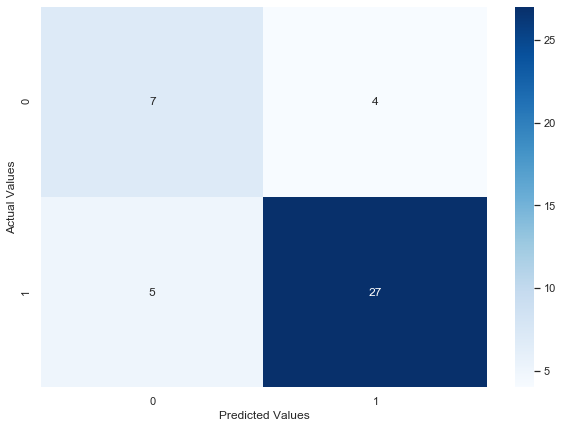



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.87      0.84      0.86        32

    accuracy                           0.79        43
   macro avg       0.73      0.74      0.73        43
weighted avg       0.80      0.79      0.79        43



In [66]:
plot_scores(dtree_CV,X_test,y_test)

# SVC Model Building

In [67]:
# Entering the parameters for hypertunning 
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.1,1,10,20,100]
parameters={
            'kernel': kernels,
            'C':C
            }

In [68]:
# Training the SVC model with RandomizedSearchCV and ploting the confusion matrix
svc=SVC()
svc_CV = RandomizedSearchCV(svc, param_distributions=parameters,cv=10,
                            n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)
svc_CV.fit(X_train, y_train)

print(svc_CV.best_params_)

{'kernel': 'linear', 'C': 20}


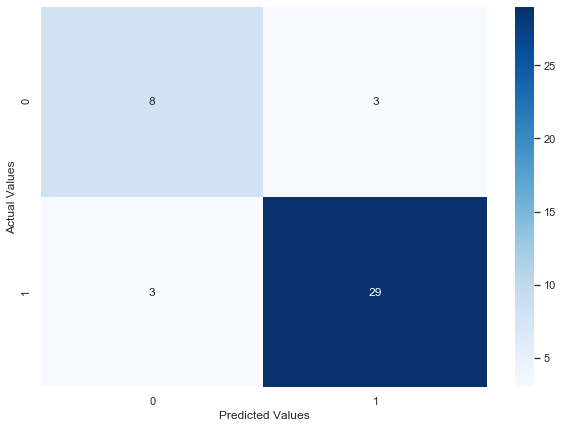



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.91      0.91      0.91        32

    accuracy                           0.86        43
   macro avg       0.82      0.82      0.82        43
weighted avg       0.86      0.86      0.86        43



In [69]:
plot_scores(svc_CV,X_test,y_test)

# RandomForest Model Building

In [70]:
# Entering the parameters for hypertunning 
param_grid = {'n_estimators': [int(x) for x in np.linspace(start=10,stop=120,num=5)], 
              'min_samples_split': [2,5,10,15,20], 
              'min_samples_leaf': [1,2,5,10,12], 
              'max_features': ["auto","sqrt"],
              'max_depth': [int(x) for x in np.linspace(start=5,stop=30,num=3)], 
              'criterion': ['entropy','gini']}

In [71]:
# Training the RandomForestClassifier model with RandomizedSearchCV 
random_forest = RandomForestClassifier()

random_forest_CV = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid, cv=10,
                             n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1,verbose=False)

random_forest_CV.fit(X_train, y_train)

print(random_forest_CV.best_params_)

{'n_estimators': 65, 'min_samples_split': 15, 'min_samples_leaf': 12, 'max_features': 'auto', 'max_depth': 5, 'criterion': 'gini'}


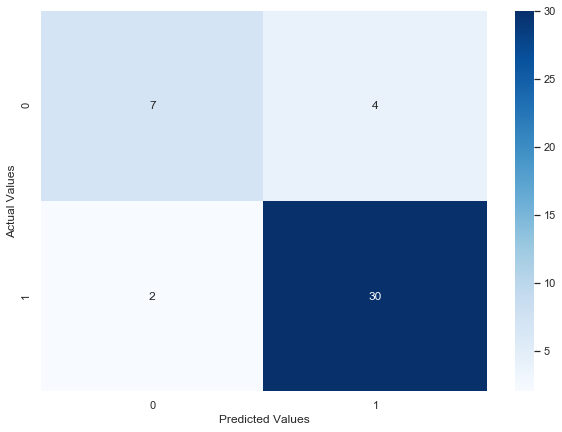



		----------Classification report----------

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.88      0.94      0.91        32

    accuracy                           0.86        43
   macro avg       0.83      0.79      0.80        43
weighted avg       0.86      0.86      0.86        43



In [72]:
plot_scores(random_forest_CV,X_test,y_test)

### Overall Observation

From the classification report the accuracy of LinearRegression is highest as compare to other models

### Since the Logistic Regression algorithm has the highest score, we will select Logistic Regression as our model.

In [73]:
log_reg=LogisticRegression(solver='liblinear',penalty='l2',C=1.0)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.8837209302325582

### Predicting the model y using train values

In [74]:
# Creating a function for THRESHOLD
def is_above_thrashold(value):
    THRESHOLD = 0.5
    return value > THRESHOLD

In [75]:
# Creating a function for prediction
def make_decision(user_input):
    log_reg=LogisticRegression(solver='liblinear',penalty='l2',C=1.0)
    log_reg.fit(X_train, y_train)
    prediction = log_reg.predict(user_input)
    
    if is_above_thrashold(prediction):
        print("Great! The Placement is Placed")
    else:
         print('Oops! The Placement is not Placed')

In [76]:
#Example 1
make_decision([[1,46,1,93,1,1,14,2,0,9,1,64]])

Great! The Placement is Placed


In [77]:
#Example 2
make_decision([[1,22,0,14,0,2,3,2,0,37,1,72]])

Oops! The Placement is not Placed


In [78]:
#Example 3
make_decision([[0,5,1,9,1,1,81,0,0,53,0,11]])

Great! The Placement is Placed
